In [1]:
%load_ext rpy2.ipython

##LoF

In [2]:
%%R
library("data.table")
d.cc.lof <- fread("/usr/data/Documents/SaveDataFromServer/CombinedDataThreeDiseases/results.cc.lof.combinedDataset.txt")


cLLK <- dim(d.cc.lof)[2]
#full.cc.LoF.rho[, cLLK] <- -full.cc.LoF.rho[, cLLK]

d.cc.lof[[cLLK]] <- -d.cc.lof[[cLLK]]
getwd()

data.table 1.9.4  For help type: ?data.table
*** NB: by=.EACHI is now explicit. See README to restore previous behaviour.
Read 2208826 rows and 8 (of 8) columns from 0.096 GB file in 00:00:03
[1] "/usr/data/Documents/GitHub/TestR/HBproject/extTADA"


In [3]:
%%R
print(dim(d.cc.lof))
head(d.cc.lof)

[1] 2208826       8
      V1 V2  V3  V4    V5  V6    V7        V8
1: 0.001  1 0.2 0.5 10000 0.5   100 -74876.58
2: 0.001  1 0.2 0.5 10000 0.5   500 -62673.84
3: 0.001  1 0.2 0.5 10000 0.5  5000 -67046.82
4: 0.001  1 0.2 0.5 10000 0.5 10000 -81242.07
5: 0.001  1 0.2 0.6 10000 0.5   100 -74875.93
6: 0.001  1 0.2 0.6 10000 0.5   500 -62673.45


In [4]:
%%R
print(table(d.cc.lof[[7]]))
print(table(d.cc.lof[[6]]))


   100    500    700    800   1500   1700   1900   2000   2100   2300   5000 
207448 206696  49248  42696 156544 156544 156544 544778 156544 156544 191408 
 10000 
183832 

   0.1    0.2    0.3    0.4    0.5    0.6    0.7    0.8    0.9      1    1.1 
 11340  11340  11340  11340 604412 552092 323588 263126 150348 135212  82300 
   1.2 
 52388 


In [5]:
%%R
library("ggplot2")

#d.cc.lof[plot(V1, -V8, xlab = 'pi')]

#p1 <- ggplot(d.cc.lof,aes(x= V1, y = -V8, group = V2)) + geom_point()
#print(p1)

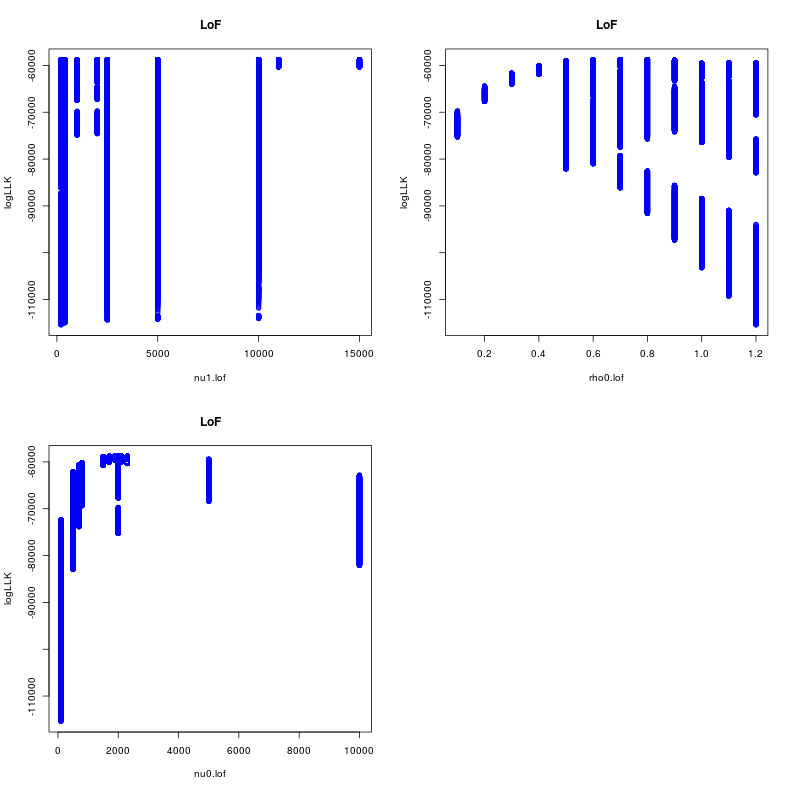

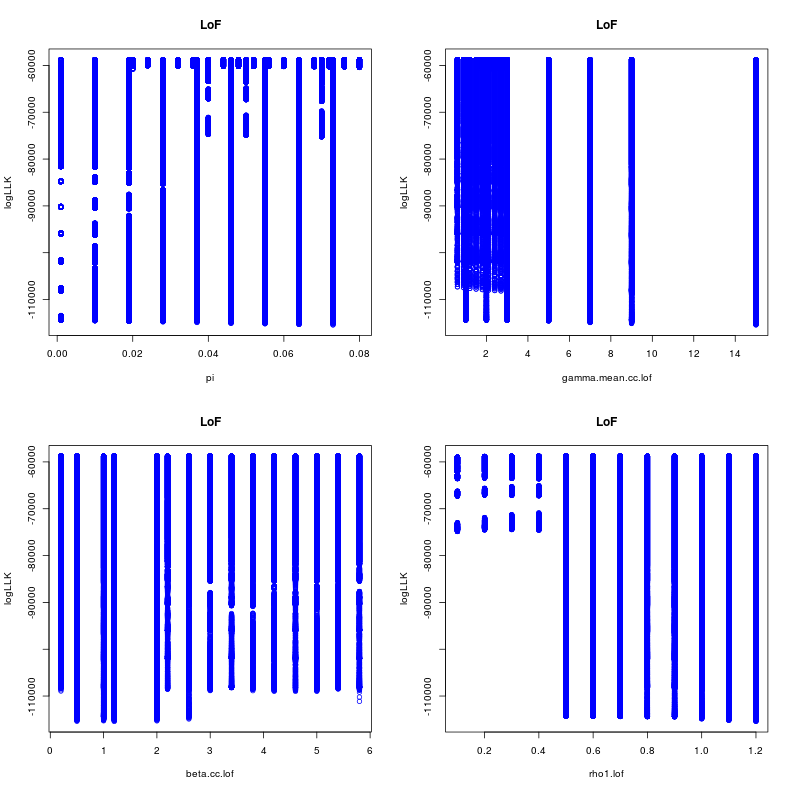

In [6]:
%%R -w 28 -h 28 -u cm
nameCol <- c("pi", "gamma.mean.cc.lof", "beta.cc.lof", "rho1.lof",
            "nu1.lof", "rho0.lof", "nu0.lof")

par(mfrow = c(2, 2))
for (ii in 1:(cLLK - 1)){
    
    plot(d.cc.lof[[ii]], d.cc.lof[[cLLK]], xlab = nameCol[ii], ylab = 'logLLK', col = 'blue',
        main = 'LoF')
}

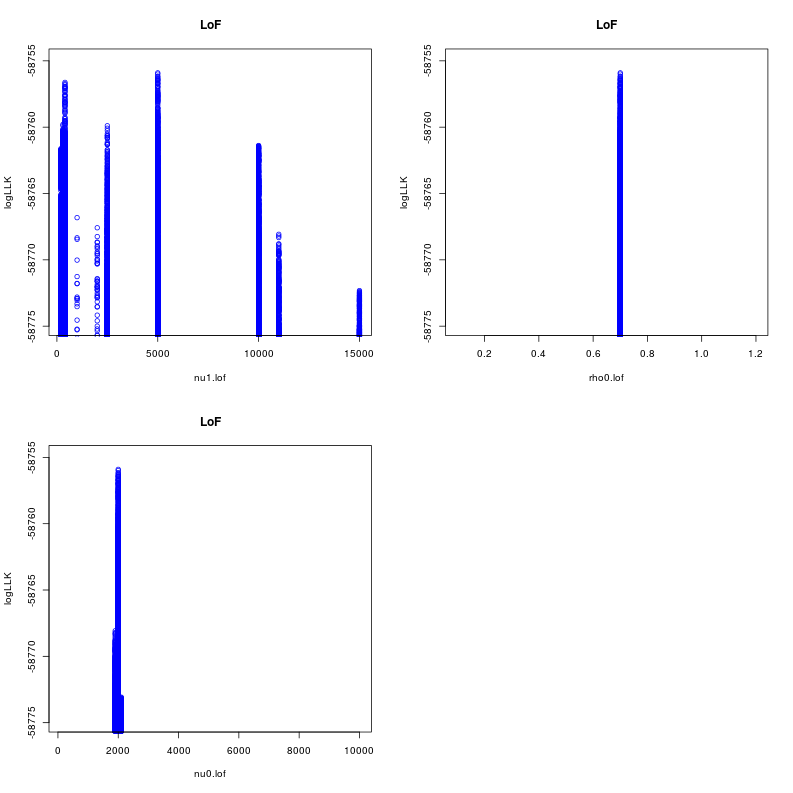

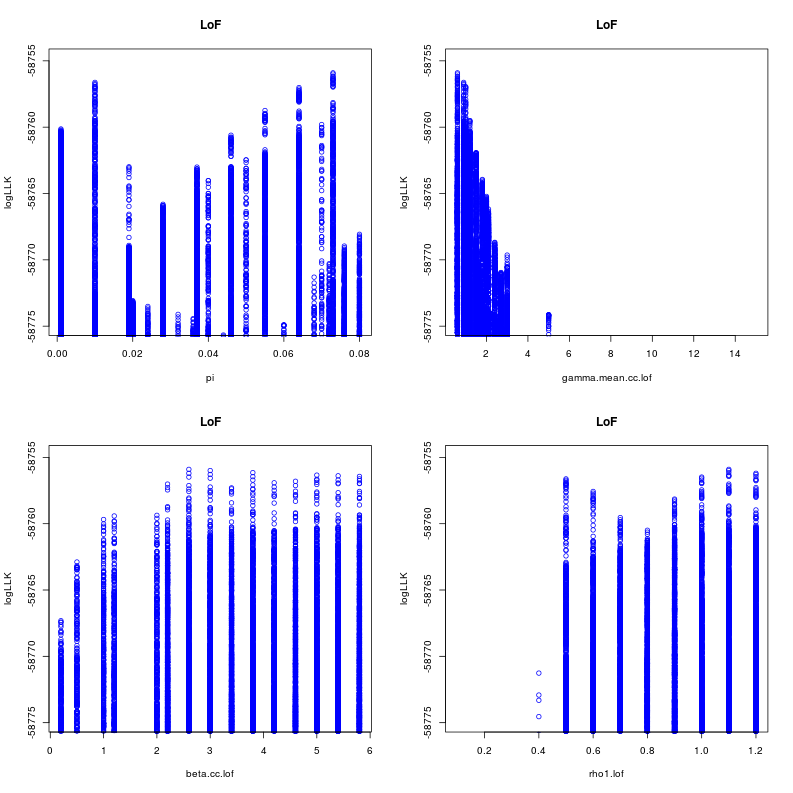

In [7]:
%%R -w 28 -h 28 -u cm
uLimit <- max(d.cc.lof[[cLLK]]) + 1
lLimit <- uLimit - 20
d.cc.lof.1 <- d.cc.lof[V6>=lLimit]
par(mfrow = c(2, 2))
for (ii in 1:(cLLK - 1)){
    plot(d.cc.lof[[ii]], d.cc.lof[[cLLK]], xlab = nameCol[ii], ylab = 'logLLK', ylim = c(lLimit, uLimit),
        col = 'blue', main = 'LoF')
}

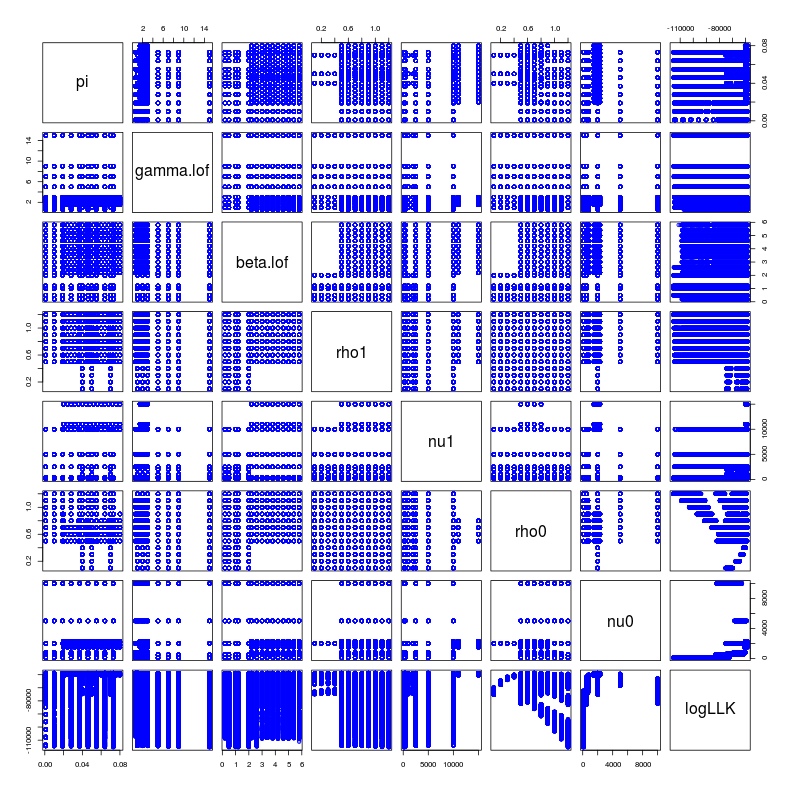

In [8]:
%%R -w 28 -h 28 -u cm
colNames <- c('pi', 'gamma.lof', 'beta.lof', 'rho1', 'nu1', 'rho0', 'nu0', 'logLLK')
pairs(d.cc.lof.1, col= 'blue', labels = colNames)

In [9]:
%%R
d.cc.lof.1[order(V8)]

            V1   V2  V3  V4   V5  V6   V7         V8
      1: 0.073 15.0 1.2 1.2  200 1.2  100 -115413.82
      2: 0.073 15.0 0.5 1.2  200 1.2  100 -115375.37
      3: 0.064 15.0 2.0 1.2  200 1.2  100 -115291.91
      4: 0.064 15.0 1.2 1.2  200 1.2  100 -115282.99
      5: 0.064 15.0 1.0 1.2  200 1.2  100 -115278.41
     ---                                            
2208822: 0.073  0.6 3.0 1.2 5000 0.7 2000  -58756.29
2208823: 0.073  0.6 2.6 1.2 5000 0.7 2000  -58756.20
2208824: 0.073  0.6 3.8 1.1 5000 0.7 2000  -58756.15
2208825: 0.073  0.6 3.0 1.1 5000 0.7 2000  -58755.99
2208826: 0.073  0.6 2.6 1.1 5000 0.7 2000  -58755.90


###Set limit for the proportion of protective variants and the frequency of variants

In [10]:
%%R
d.cc.lof.1 <- d.cc.lof[pgamma(1, V2*V3, rate = V3) < 0.02]

d.cc.lof.1 <- d.cc.lof.1[V4/V5 <= V6/V7]

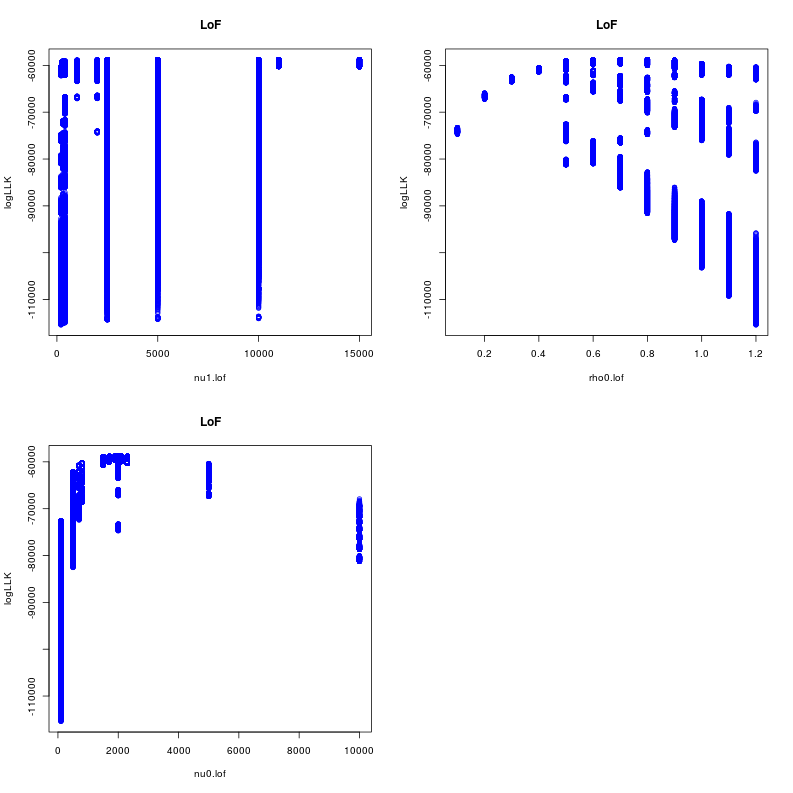

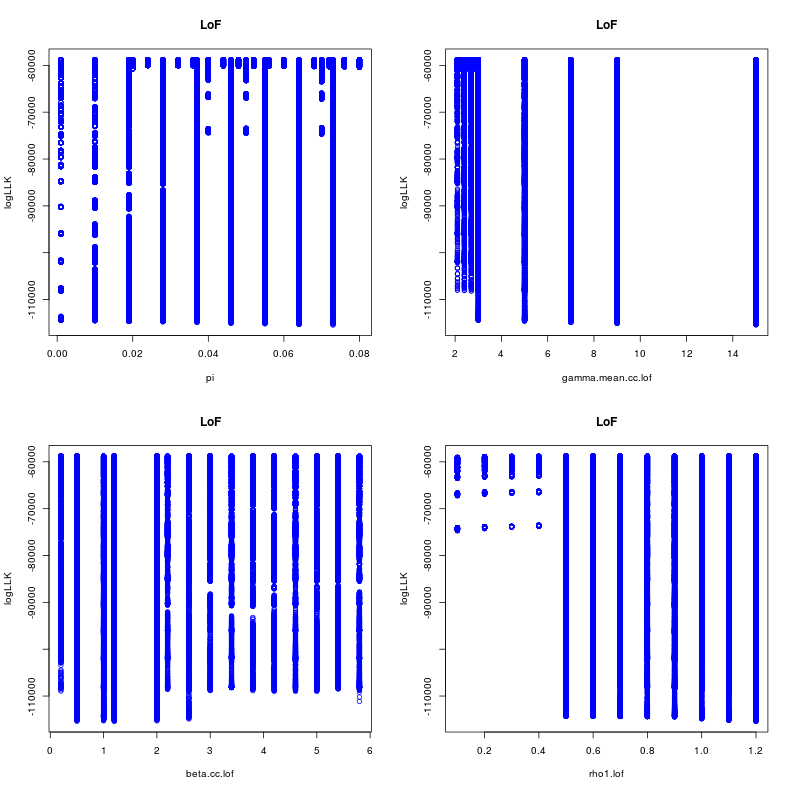

In [11]:
%%R -w 28 -h 28 -u cm
nameCol <- c("pi", "gamma.mean.cc.lof", "beta.cc.lof", "rho1.lof",
            "nu1.lof", "rho0.lof", "nu0.lof")

par(mfrow = c(2, 2))
for (ii in 1:(cLLK - 1)){
    plot(d.cc.lof.1[[ii]], d.cc.lof.1[[cLLK]], xlab = nameCol[ii], ylab = 'logLLK', col= 'blue', main = 'LoF')
}

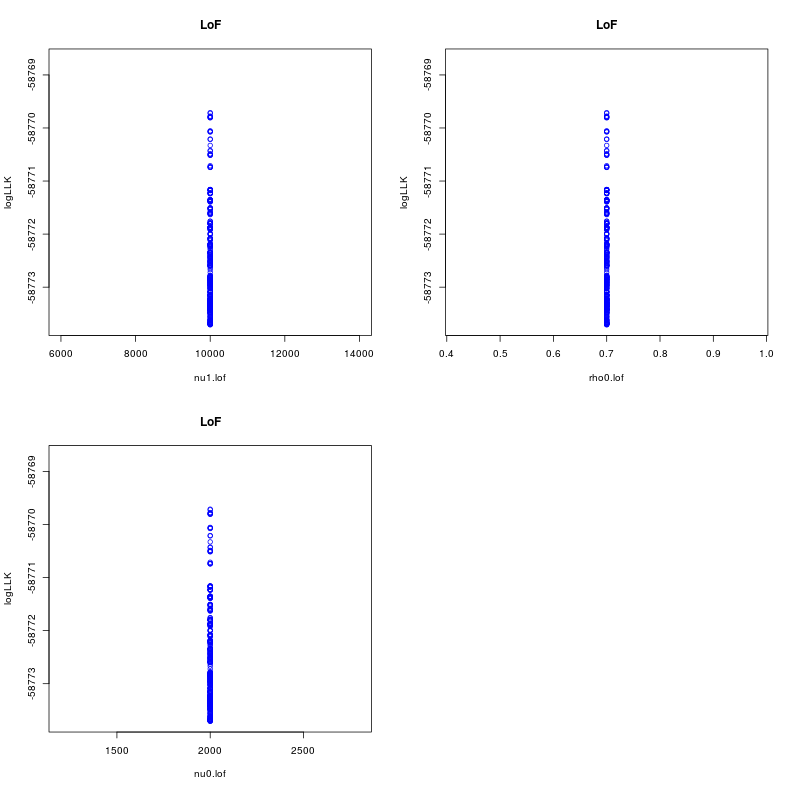

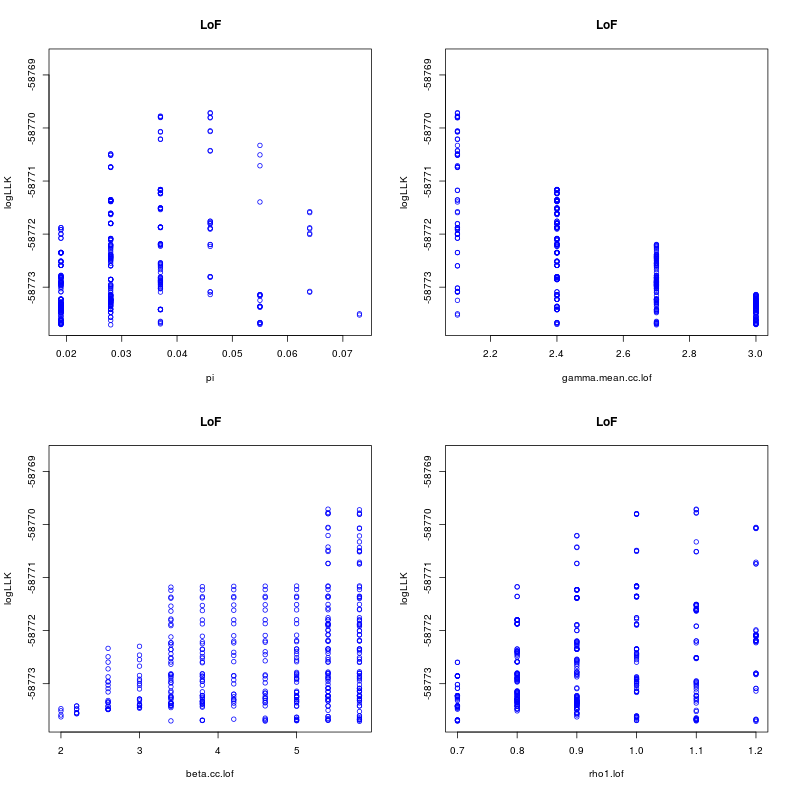

In [12]:
%%R -w 28 -h 28 -u cm
uLimit <- max(d.cc.lof.1[[cLLK]]) + 1
lLimit <- uLimit - 5
d.cc.lof.1 <- d.cc.lof.1[V8>=lLimit]
par(mfrow = c(2, 2))
for (ii in 1:(cLLK - 1)){
    plot(d.cc.lof.1[[ii]], d.cc.lof.1[[cLLK]], xlab = nameCol[ii], ylab = 'logLLK', 
         ylim = c(lLimit, uLimit), col = 'blue',main = 'LoF')
}

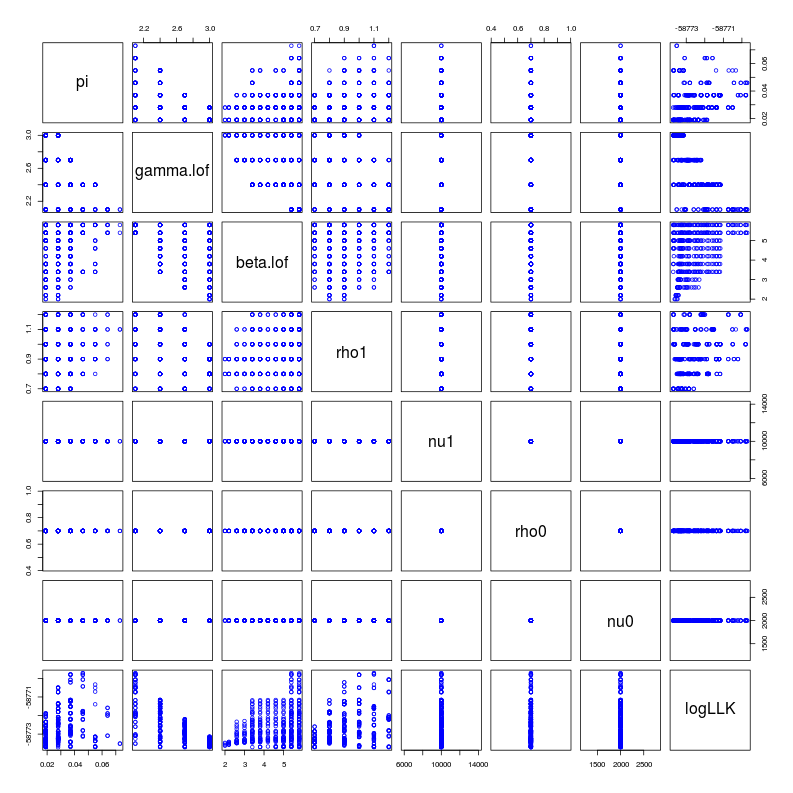

In [13]:
%%R -w 28 -h 28 -u cm
pairs(d.cc.lof.1, col = 'blue', labels = colNames)

In [14]:
%%R
head(d.cc.lof.1[order(V8)], 40)


       V1  V2  V3  V4    V5  V6   V7        V8
 1: 0.028 2.7 5.8 1.2 10000 0.7 2000 -58773.71
 2: 0.019 3.0 4.6 0.7 10000 0.7 2000 -58773.70
 3: 0.055 2.4 3.4 1.1 10000 0.7 2000 -58773.70
 4: 0.019 3.0 5.0 0.7 10000 0.7 2000 -58773.70
 5: 0.019 3.0 5.0 0.7 10000 0.7 2000 -58773.70
 6: 0.019 3.0 3.8 1.0 10000 0.7 2000 -58773.69
 7: 0.019 3.0 3.8 1.0 10000 0.7 2000 -58773.69
 8: 0.037 2.7 4.6 1.1 10000 0.7 2000 -58773.69
 9: 0.019 2.7 5.0 1.2 10000 0.7 2000 -58773.69
10: 0.019 3.0 5.4 0.7 10000 0.7 2000 -58773.69
11: 0.019 3.0 5.4 0.7 10000 0.7 2000 -58773.69
12: 0.055 2.4 3.8 1.1 10000 0.7 2000 -58773.69
13: 0.019 3.0 5.8 0.7 10000 0.7 2000 -58773.68
14: 0.019 3.0 5.8 0.7 10000 0.7 2000 -58773.68
15: 0.019 2.7 5.4 1.2 10000 0.7 2000 -58773.68
16: 0.037 2.7 5.0 1.1 10000 0.7 2000 -58773.67
17: 0.055 2.4 4.6 1.1 10000 0.7 2000 -58773.67
18: 0.019 2.7 5.8 1.2 10000 0.7 2000 -58773.67
19: 0.019 3.0 4.2 1.0 10000 0.7 2000 -58773.67
20: 0.055 2.4 5.0 1.1 10000 0.7 2000 -58773.67
21: 0.055 2.4

In [15]:
#!gist -p Test_grid_cc_using_rho1_and_rho1.ipynb

In [16]:
!gist -u https://gist.github.com/4ca6173b8e60c0221f7c Test_grid_cc_using_rho1_and_rho1_combinedDataSet_allGenes.ipynb

https://gist.github.com/4ca6173b8e60c0221f7c


##MIS3

In [17]:
%%R
library("data.table")
d.cc.mis3 <- fread("/usr/data/Documents/SaveDataFromServer/CombinedDataThreeDiseases/results.cc.mis3.combinedDataset.txt")


cLLK1 <- dim(d.cc.mis3)[2]
d.cc.mis3 <- d.cc.mis3[V8 != "NA"]
#full.cc.LoF.rho[, cLLK] <- -full.cc.LoF.rho[, cLLK]
getwd()

[1] "/usr/data/Documents/GitHub/TestR/HBproject/extTADA"


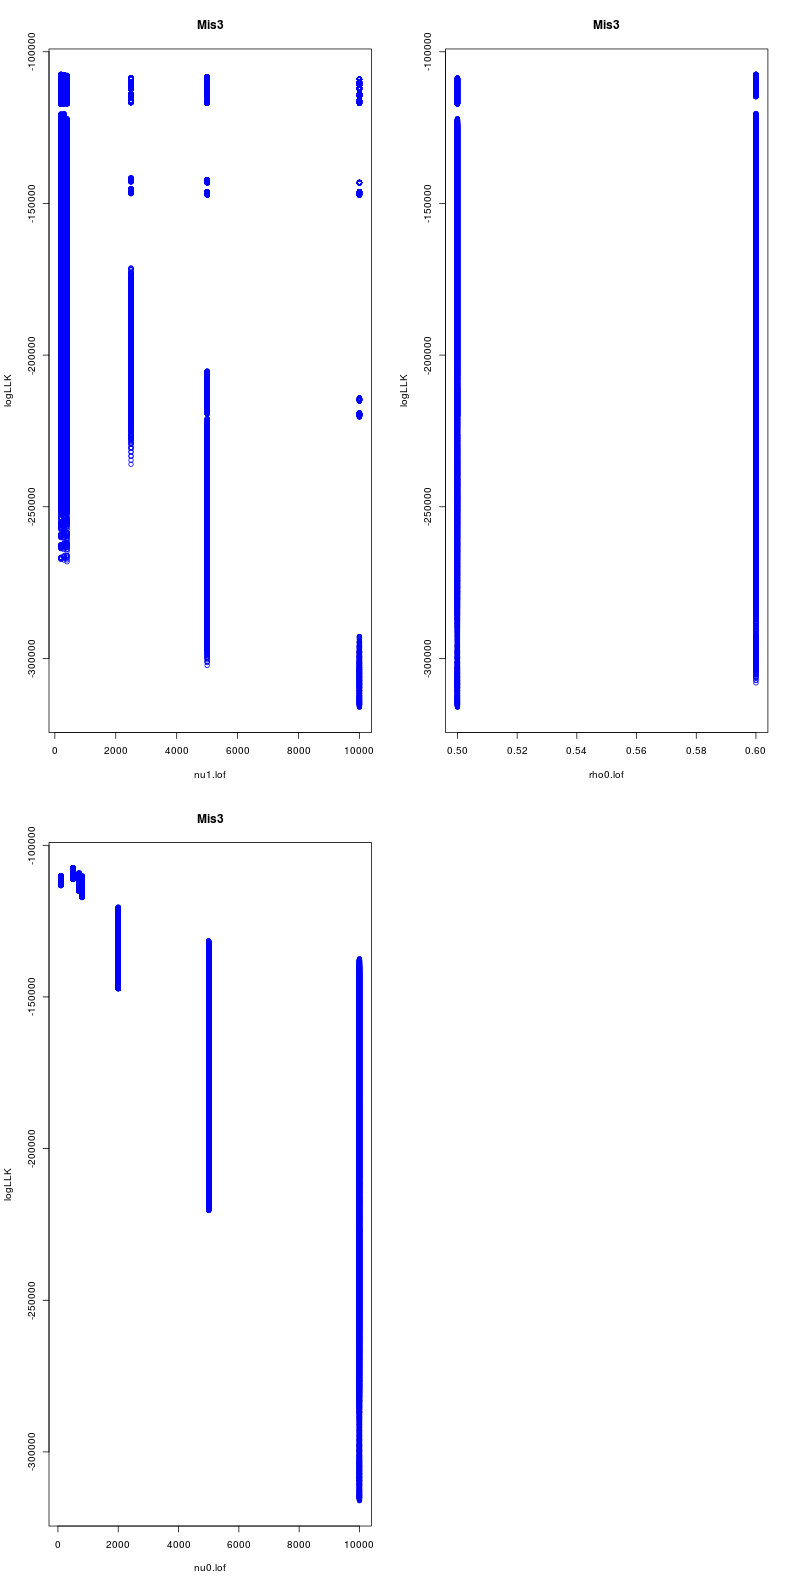

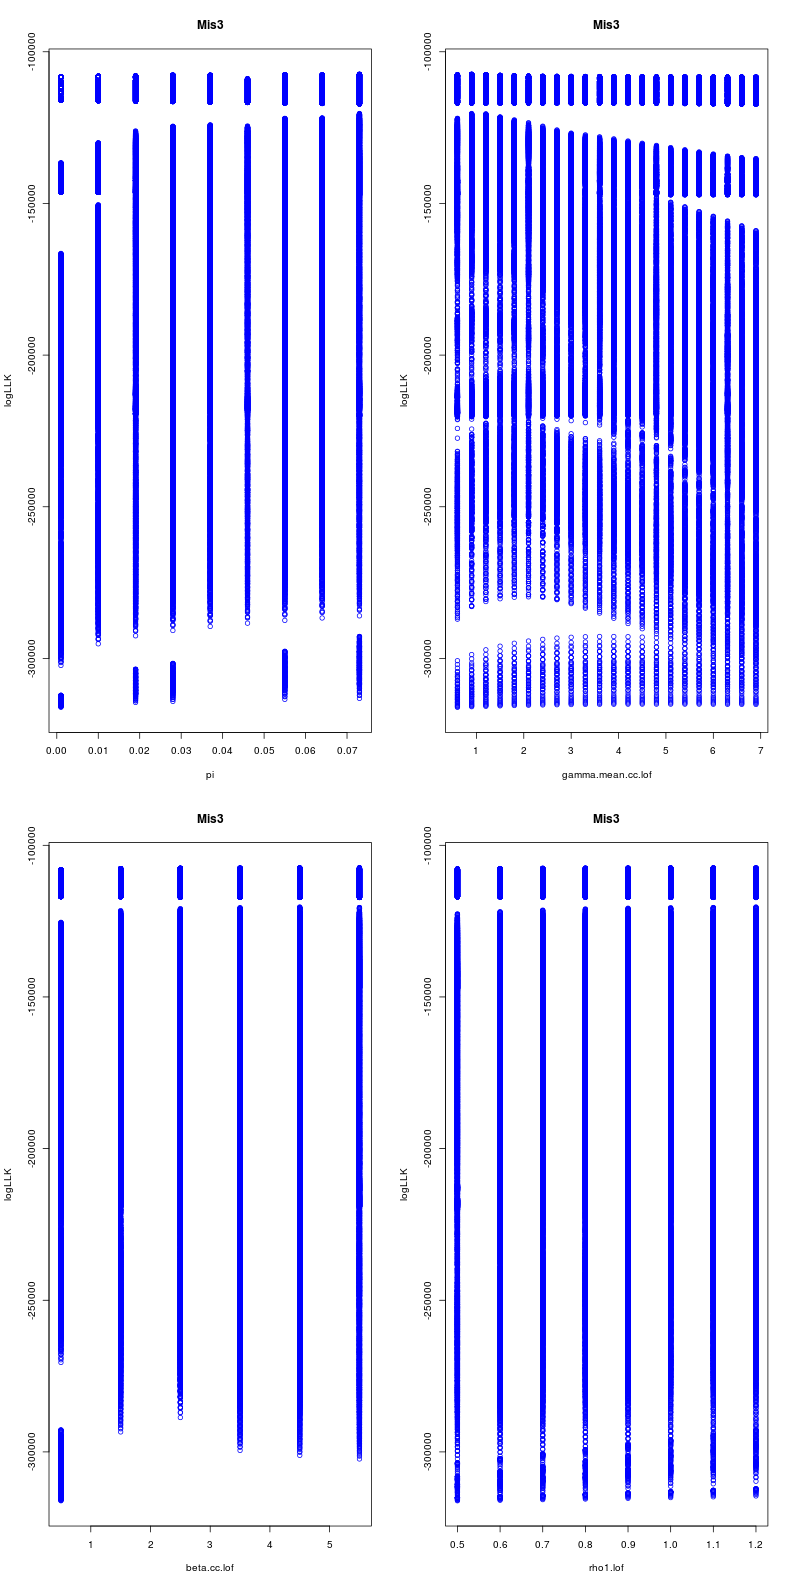

In [18]:
%%R -w 28 -h 56 -u cm
nameCol <- c("pi", "gamma.mean.cc.lof", "beta.cc.lof", "rho1.lof",
            "nu1.lof", "rho0.lof", "nu0.lof")

par(mfrow = c(2, 2))
for (ii in 1:(cLLK1 -1)){
    
    plot(d.cc.mis3[[ii]], -d.cc.mis3[[cLLK1]], xlab = nameCol[ii], ylab = 'logLLK',
        col = 'blue', main = 'Mis3')
}

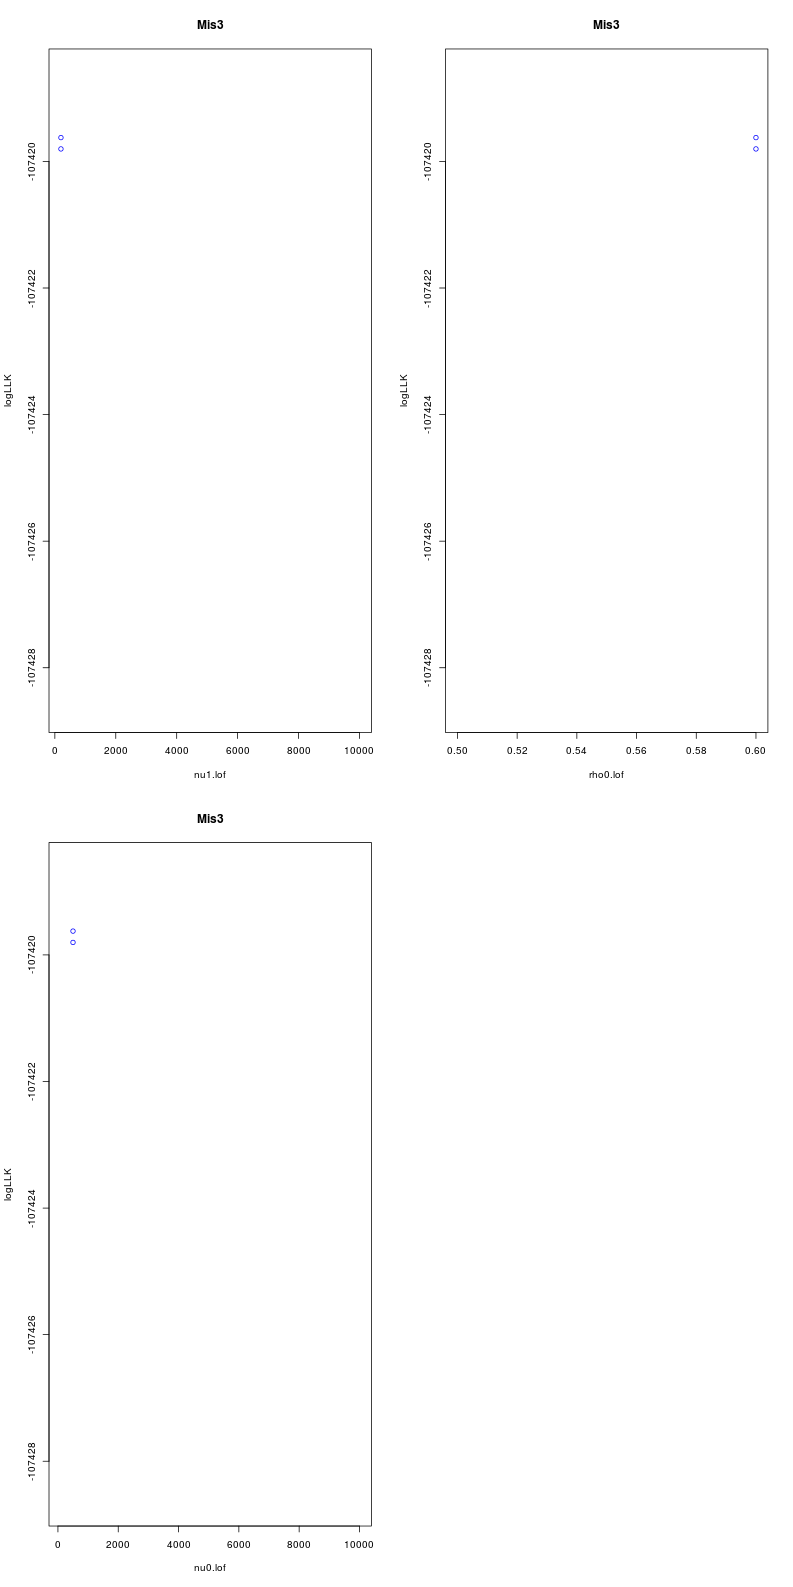

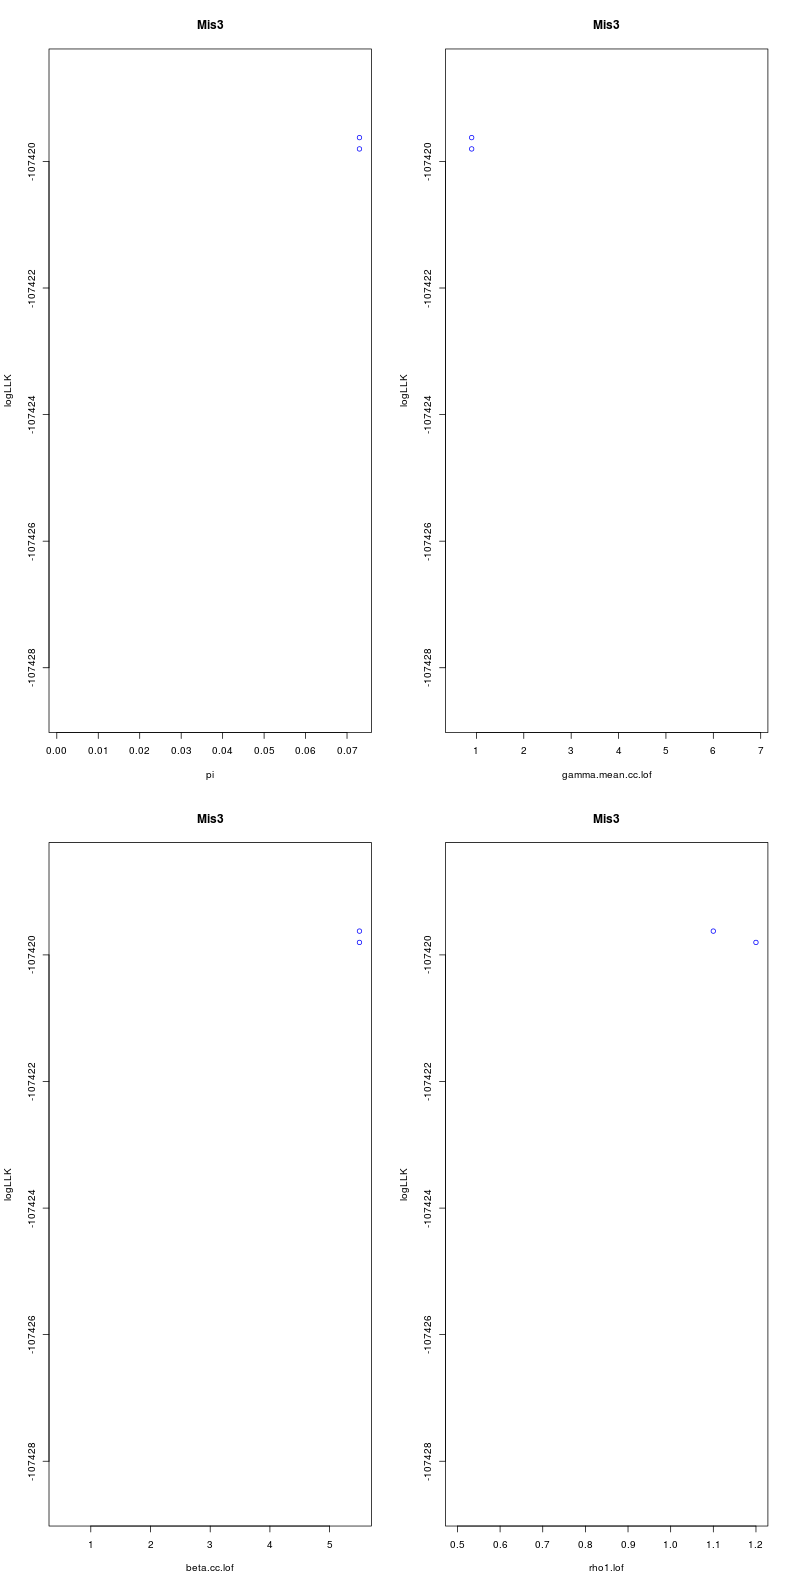

In [19]:
%%R -w 28 -h 56 -u cm
uLimit <- max(-d.cc.mis3[[cLLK1]]) + 1
lLimit <- uLimit - 10

par(mfrow = c(2, 2))
for (ii in 1:(cLLK1 -1)){
    plot(d.cc.mis3[[ii]], -d.cc.mis3[[cLLK]], xlab = nameCol[ii], ylab = 'logLLK', 
         ylim = c(lLimit, uLimit), col = 'blue', main = 'Mis3')
}

In [20]:
%%R
d.cc.mis3.1 <- d.cc.mis3[pgamma(1, V2*V3, rate = V3) < 0.02]

d.cc.mis3.1 <- d.cc.mis3.1[V4/V5 <= V6/V7]

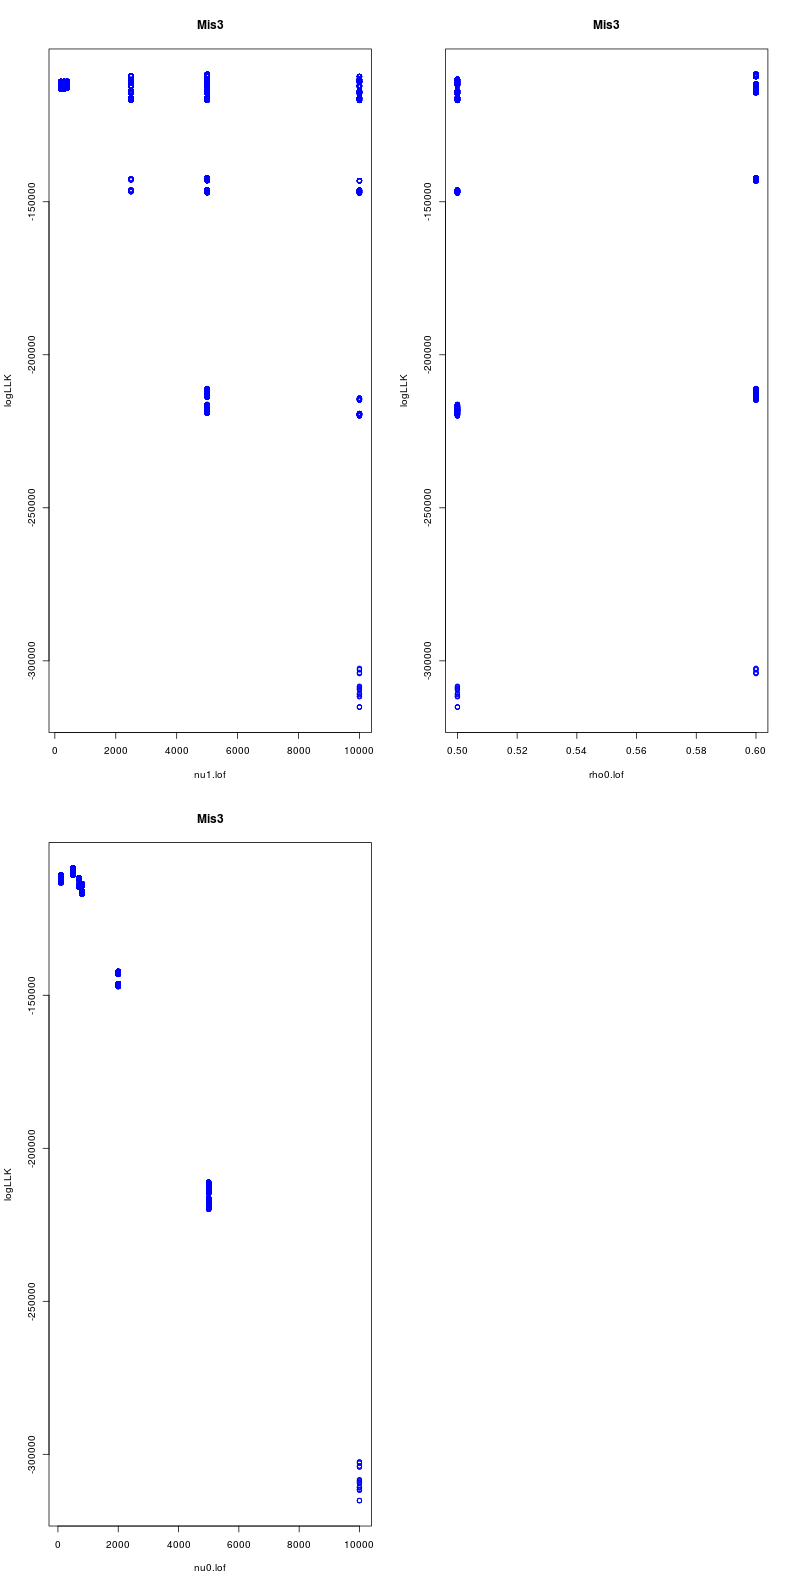

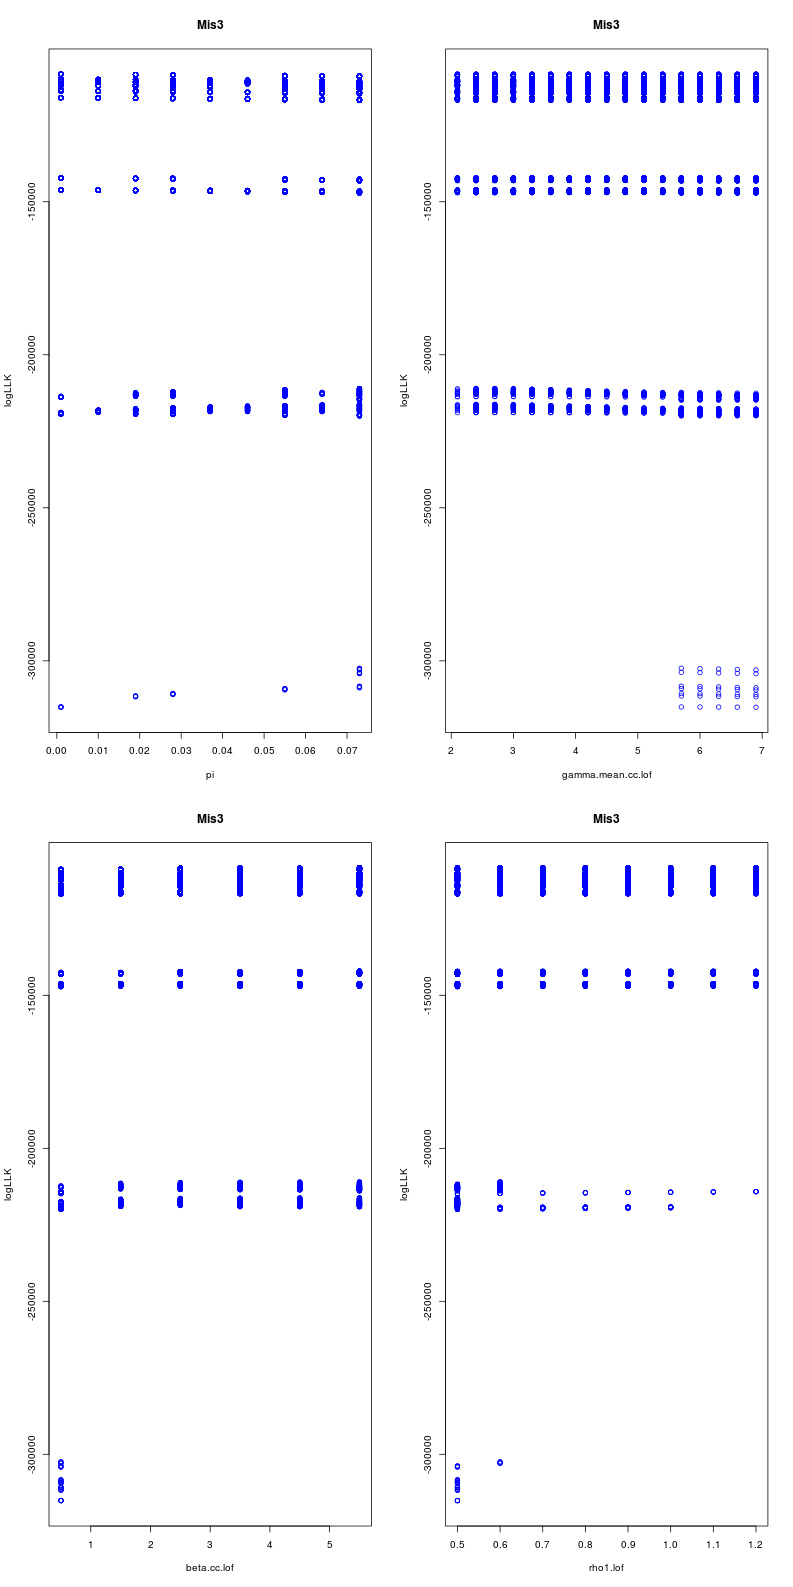

In [21]:
%%R -w 28 -h 56 -u cm
nameCol <- c("pi", "gamma.mean.cc.lof", "beta.cc.lof", "rho1.lof",
            "nu1.lof", "rho0.lof", "nu0.lof")

par(mfrow = c(2, 2))
for (ii in 1:(cLLK -1)){
    plot(d.cc.mis3.1[[ii]], -d.cc.mis3.1[[cLLK]], xlab = nameCol[ii], 
         ylab = 'logLLK', col = 'blue', main = 'Mis3')
}

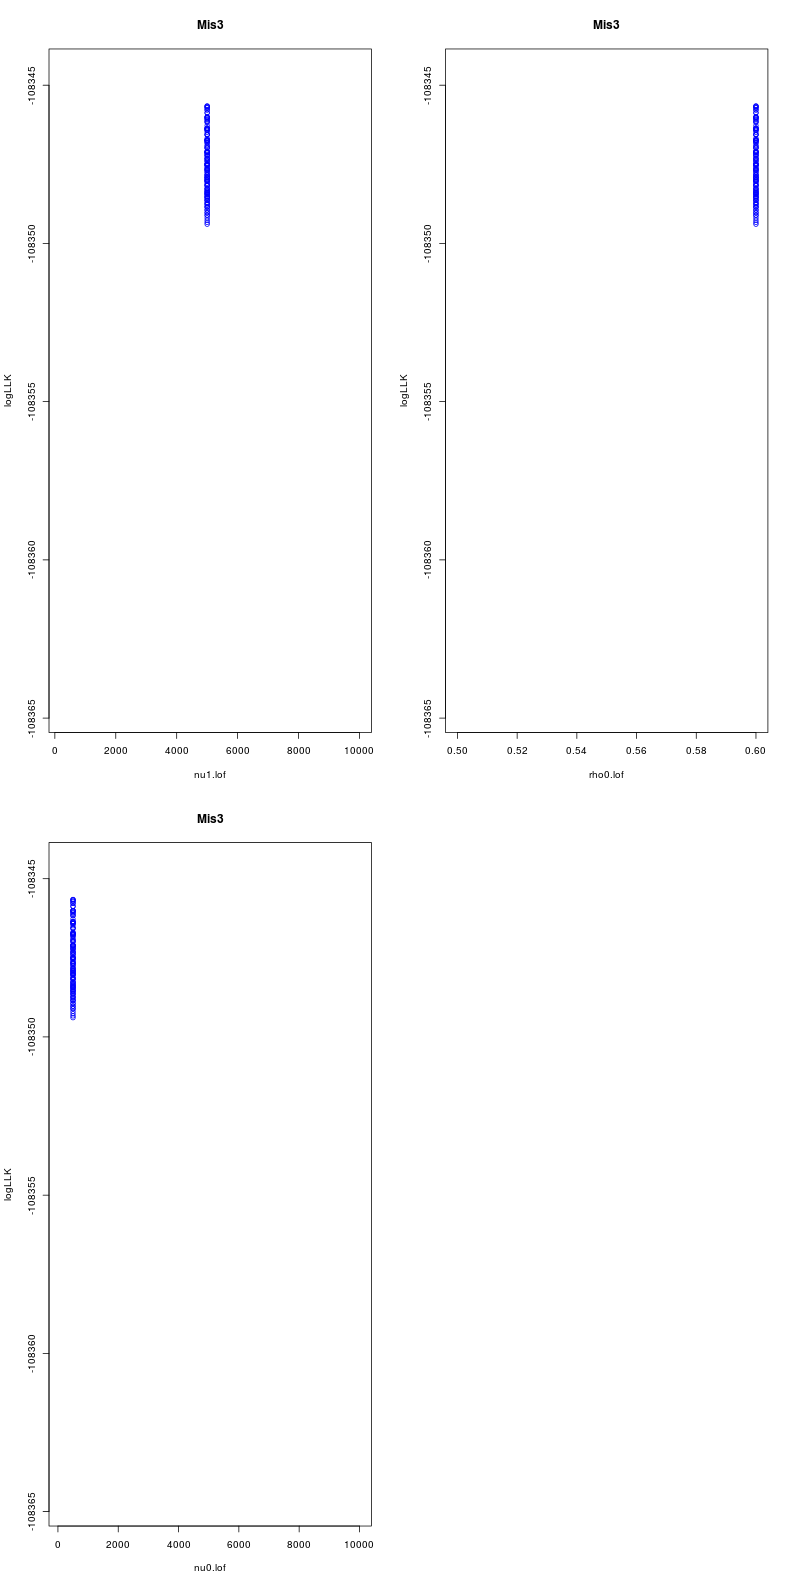

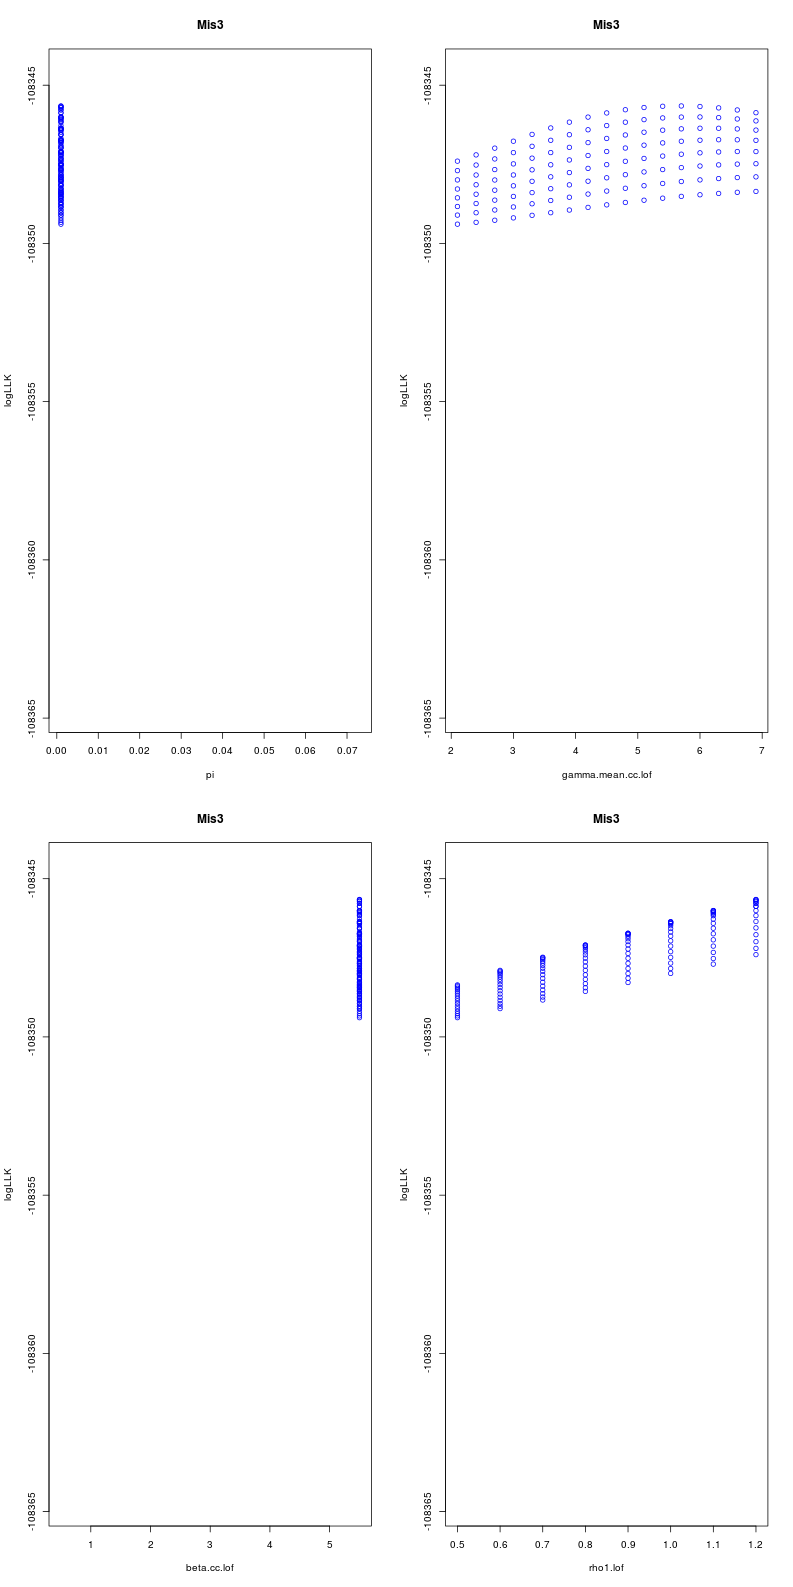

In [23]:
%%R -w 28 -h 56 -u cm
uLimit <- max(-d.cc.mis3.1[[cLLK]]) + 1
lLimit <- uLimit - 20

par(mfrow = c(2, 2))
for (ii in 1:(cLLK -1)){
    plot(d.cc.mis3.1[[ii]], -d.cc.mis3.1[[cLLK]], xlab = nameCol[ii], 
         ylab = 'logLLK', ylim = c(lLimit, uLimit), col = 'blue', main = 'Mis3')
}

In [24]:
%%R
d.cc.mis3.1[V8>=lLimit]

          V1  V2  V3  V4    V5  V6   V7       V8
    1: 0.001 5.7 0.5 0.5 10000 0.5  100 110696.0
    2: 0.001 5.7 0.5 0.6 10000 0.5  100 110695.5
    3: 0.001 5.7 0.5 0.7 10000 0.5  100 110695.0
    4: 0.001 5.7 0.5 0.8 10000 0.5  100 110694.6
    5: 0.001 5.7 0.5 0.9 10000 0.5  100 110694.1
   ---                                          
63428: 0.073 6.9 5.5 0.8  5000 0.6 2000 142983.4
63429: 0.073 6.9 5.5 0.9  5000 0.6 2000 142961.3
63430: 0.073 6.9 5.5 1.0  5000 0.6 2000 142941.5
63431: 0.073 6.9 5.5 1.1  5000 0.6 2000 142923.6
63432: 0.073 6.9 5.5 1.2  5000 0.6 2000 142907.7
